# 2장 Data Wrangling

#### 코드 출처 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook

# 1절 Data Loading

## 1.1 샘플 데이터셋 적재

In [1]:
# 사이킷런의 데이터셋을 적재합니다.
from sklearn import datasets

# 숫자 데이터셋을 적재합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

# 첫 번째 샘플을 확인합니다.
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 붙임

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# DESCR 키는 데이터셋에 대한 설명을 담고 있습니다.
digits['DESCR'][:70]

'.. _digits_dataset:\n\nOptical recognition of handwritten digits dataset'

In [4]:
import numpy as np

# 0에서부터 4까지 다섯 개의 숫자만 적재합니다.
X, y = datasets.load_digits(n_class=5, return_X_y=True)
# 배열에 있는 고유한 값을 반환합니다.
np.unique(y)

array([0, 1, 2, 3, 4])

# 1.2 모의 데이터셋 만들기

In [6]:
# Regression: 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression

# 특성 행렬, 타깃 벡터, 정답 계수를 생성합니다.
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [7]:
# classification: 라이브러리를 임포트합니다.
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
타깃 벡터
 [1 0 0]


In [15]:
# Clustering: 라이브러리를 임포트합니다.
# the centers parameter determines the number of clusters generated.
from sklearn.datasets import make_blobs

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

# 특성 행렬과 타깃 벡터를 확인합니다.
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


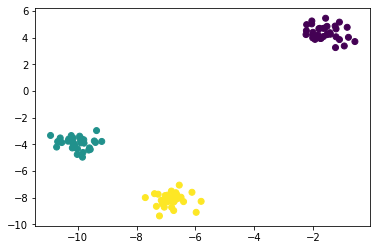

In [16]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
# 산점도를 출력합니다.
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## 1.3 CSV 파일 적재

In [17]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-data'

# 데이터 적재
dataframe = pd.read_csv(url)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


### 붙임

In [18]:
# 1~10번째 행을 건너 뛰고 한 행을 읽습니다.
dataframe = pd.read_csv(url, skiprows=range(1, 11), nrows=1)
dataframe

,integer,datetime,category
0,5,2015-01-01 00:00:10,0


## 1.4 엑셀 파일 적재

In [19]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-excel'

# 데이터 적재
dataframe = pd.read_excel(url, sheet_name=0, header=1)

# 처음 두 행을 확인합니다.
dataframe.head(2)

,5,2015-01-01 00:00:00,0
0,5,2015-01-01 00:00:01,0
1,9,2015-01-01 00:00:02,0


## 1.5 JSON 파일 적재하기

In [20]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/simulated-json'

# 데이터 적재
dataframe = pd.read_json(url, orient='columns')

# 처음 두 행을 확인합니다.
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


## 1.6 SQL 데이터베이스로부터 적재

In [30]:
# 코랩에서 실행하는 경우 다음 주석을 제거하고 실행하세요.
#!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/sample.db -O sample.db

In [21]:
# 라이브러리를 임포트합니다.
import pandas as pd
from sqlalchemy import create_engine

# 데이터베이스에 연결합니다.
database_connection = create_engine('sqlite:///sample.db')

# 데이터를 적재합니다.
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# 처음 두 개의 행을 확인합니다.
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


### 붙임

In [22]:
# 테이블의 전체 데이터를 가져 옵니다.
dataframe = pd.read_sql_table('data', database_connection)
dataframe.head(2)

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94


# 2절 Data Wrangling

## 2.1 데이터프레임 만들기

In [6]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 열을 추가합니다.
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# 데이터프레임을 확인합니다.
dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [7]:
# 열을 만듭니다.
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver'])

# 열을 추가합니다.
dataframe.append(new_person, ignore_index=True)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False
2,Molly Mooney,40,True


In [8]:
import numpy as np

data = [ ['Jacky Jackson', 38, True], ['Steven Stevenson', 25, False] ]

matrix = np.array(data)
pd.DataFrame(matrix, columns=['Name', 'Age', 'Driver'])

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [9]:
pd.DataFrame(data, columns=['Name', 'Age', 'Driver'])

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [10]:
data = {'Name': ['Jacky Jackson', 'Steven Stevenson'],
        'Age': [38, 25],
        'Driver': [True, False]}
pd.DataFrame(data)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [11]:
data = [ {'Name': 'Jacky Jackson', 'Age': 38, 'Driver': True},
         {'Name': 'Steven Stevenson', 'Age': 25, 'Driver': False} ]
pd.DataFrame(data, index=['row1', 'row2'])

,Name,Age,Driver
row1,Jacky Jackson,38,True
row2,Steven Stevenson,25,False


## 2.2 데이터프레임 탐색하기

In [22]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/titanic-csv'

# 데이터를 적재합니다.
dataframe = pd.read_csv(url)

# 두 개의 행을 확인합니다.
dataframe.head(5)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [23]:
# 차원을 확인합니다.
dataframe.shape

(1313, 6)

In [24]:
# 통곗값을 확인합니다.
dataframe.describe()

,Age,Survived,SexCode
count,756.000000,1313.000000,1313.000000
mean,30.397989,0.342727,0.351866
std,14.259049,0.474802,0.477734
min,0.170000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000
75%,39.000000,1.000000,1.000000
max,71.000000,1.000000,1.000000


In [25]:
# 첫 번째 행을 선택합니다.
dataframe.iloc[0]

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                   29
Sex                               female
Survived                               1
SexCode                                1
Name: 0, dtype: object

In [16]:
# 세 개의 행을 선택합니다.
dataframe.iloc[1:4]

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [17]:
# 네 개의 행을 선택합니다.
dataframe.iloc[:4]

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


In [18]:
# 인덱스를 설정합니다.
dataframe = dataframe.set_index(dataframe['Name'])

# 행을 확인합니다.
dataframe.loc['Allen, Miss Elisabeth Walton']

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                   29
Sex                               female
Survived                               1
SexCode                                1
Name: Allen, Miss Elisabeth Walton, dtype: object

### 붙임

In [19]:
# 'Allison, Miss Helen Loraine' 이전까지 Age 열과 Sex 열만 선택합니다.
dataframe.loc[:'Allison, Miss Helen Loraine', 'Age':'Sex']

,Age,Sex
Name,,
"Allen, Miss Elisabeth Walton",29.0,female
"Allison, Miss Helen Loraine",2.0,female


In [20]:
# dataframe[:2]와 동일합니다.
dataframe[:'Allison, Miss Helen Loraine']

,Name,PClass,Age,Sex,Survived,SexCode
Name,,,,,,
"Allen, Miss Elisabeth Walton","Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
"Allison, Miss Helen Loraine","Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [17]:
dataframe[['Age', 'Sex']].head(2)

,Age,Sex
Name,,
"Allen, Miss Elisabeth Walton",29.0,female
"Allison, Miss Helen Loraine",2.0,female


In [27]:
# 조건에 따라 행을 선택하기
# ‘sex’ 열이 ‘female’인 행 중 처음 두 개를 출력합니다.
dataframe[dataframe['Sex'] == 'female'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [28]:
# 행을 필터링합니다.
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

,Name,PClass,Age,Sex,Survived,SexCode
73,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1,1


## 2.3 값 치환, 열 이름 바꾸기

In [29]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/titanic-csv'

# 데이터를 적재합니다.
dataframe = pd.read_csv(url)

# 값을 치환하고 두 개의 행을 출력합니다.
dataframe['Sex'].replace("female", "Woman").head(2)

0    Woman
1    Woman
Name: Sex, dtype: object

In [30]:
# "female"과 "male을 "Woman"과 "Man"으로 치환합니다.
dataframe['Sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

0    Woman
1    Woman
2      Man
3    Woman
4      Man
Name: Sex, dtype: object

In [31]:
# 값을 치환하고 두 개의 행을 출력합니다.
dataframe.replace(1, "One").head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29,female,One,One
1,"Allison, Miss Helen Loraine",1st,2,female,0,One


In [32]:
# 값을 치환하고 두 개의 행을 출력합니다.
dataframe.replace(r"1st", "First", regex=True).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",First,29.0,female,1,1
1,"Allison, Miss Helen Loraine",First,2.0,female,0,1


In [33]:
# female과 male을 person으로 바꿉니다.
dataframe.replace(["female", "male"], "person").head(3)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,person,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,person,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,person,0,0


In [34]:
# female을 1로 바꾸고 male을 0으로 바꿉니다.
dataframe.replace({"female": 1, "male": 0}).head(3)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,1,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,1,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,0,0,0


In [35]:
# 열 이름을 바꾸고 두 개의 행을 출력합니다.
dataframe.rename(columns={'PClass': 'Passenger Class'}).head(2)

,Name,Passenger Class,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [36]:
# 열 이름을 바꾸고 두 개의 행을 출력합니다.
dataframe.rename(columns={'PClass': 'Passenger Class', 'Sex': 'Gender'}).head(2)

,Name,Passenger Class,Age,Gender,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [37]:
# 라이브러리를 임포트합니다.
import collections

# 딕셔너리를 만듭니다.
column_names = collections.defaultdict(str)

# 키를 만듭니다.
for name in dataframe.columns:
    column_names[name]

# 딕셔너리를 출력합니다.
column_names

defaultdict(str,
            {'Name': '',
             'PClass': '',
             'Age': '',
             'Sex': '',
             'Survived': '',
             'SexCode': ''})

In [38]:
# 인덱스 0을 -1로 바꿉니다.
dataframe.rename(index={0:-1}).head(2)

,Name,PClass,Age,Sex,Survived,SexCode
-1,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [39]:
# 열 이름을 소문자로 바꿉니다.
dataframe.rename(str.lower, axis='columns').head(2)

,name,pclass,age,sex,survived,sexcode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


## 2.4 최솟값, 최댓값, 합, 평균 계산 및 개수 세기

In [40]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/titanic-csv'

# 데이터를 적재합니다.
dataframe = pd.read_csv(url)

# 통곗값을 계산합니다.
print('최댓값:', dataframe['Age'].max())
print('최솟값:', dataframe['Age'].min())
print('평균:', dataframe['Age'].mean())
print('합:', dataframe['Age'].sum())
print('카운트:', dataframe['Age'].count())

최댓값: 71.0
최솟값: 0.17
평균: 30.397989417989415
합: 22980.88
카운트: 756


In [41]:
# 카운트를 출력합니다.
dataframe.count()

Name        1313
PClass      1313
Age          756
Sex         1313
Survived    1313
SexCode     1313
dtype: int64

In [42]:
# 수치형 열의 공분산을 계산합니다.
dataframe.cov()

,Age,Survived,SexCode
Age,203.320470,-0.430491,-0.382054
Survived,-0.430491,0.225437,0.114070
SexCode,-0.382054,0.114070,0.228230


In [43]:
# 수치형 열의 상관계수를 계산합니다.
dataframe.corr()

,Age,Survived,SexCode
Age,1.000000,-0.061254,-0.055138
Survived,-0.061254,1.000000,0.502891
SexCode,-0.055138,0.502891,1.000000


In [35]:
# 고유한 값을 찾습니다.
dataframe['Sex'].unique()

array(['female', 'male'], dtype=object)

In [44]:
# 카운트를 출력합니다.
dataframe['Sex'].value_counts()

male      851
female    462
Name: Sex, dtype: int64

In [45]:
# 카운트를 출력합니다.
dataframe['PClass'].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

In [46]:
# 고유한 값의 개수를 출력합니다.
dataframe['PClass'].nunique()

4

In [47]:
dataframe.nunique()

Name        1310
PClass         4
Age           75
Sex            2
Survived       2
SexCode        2
dtype: int64

In [49]:
## 누락된 값을 선택하고 두 개의 행을 출력합니다.
dataframe[dataframe['Age'].isnull()].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,NaN,female,1,1
13,"Barkworth, Mr Algernon H",1st,NaN,male,1,0


In [50]:
# NaN으로 값을 바꾸려고 합니다.
dataframe['Sex'] = dataframe['Sex'].replace('male', NaN)

NameError: name 'NaN' is not defined

In [51]:
# 라이브러리를 임포트합니다.
import numpy as np

# NaN으로 값을 바꿉니다.
dataframe['Sex'] = dataframe['Sex'].replace('male', np.nan)

In [52]:
# 데이터를 적재하고 누란된 값을 설정합니다.
dataframe = pd.read_csv(url, na_values=[np.nan, 'NONE', -999])

In [44]:
dataframe = pd.read_csv(url, na_values=['female'], 
                        keep_default_na=False)
dataframe[12:14]

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,,NaN,1,1
13,"Barkworth, Mr Algernon H",1st,,male,1,0


In [45]:
dataframe = pd.read_csv(url, na_filter=False)
dataframe[12:14]

,Name,PClass,Age,Sex,Survived,SexCode
12,"Aubert, Mrs Leontine Pauline",1st,,female,1,1
13,"Barkworth, Mr Algernon H",1st,,male,1,0


## 2.5 열과 행 삭제

In [53]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/titanic-csv'

# 데이터를 적재합니다.
dataframe = pd.read_csv(url)

# 열을 삭제합니다.
dataframe.drop('Age', axis=1).head(2)

,Name,PClass,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,female,1,1
1,"Allison, Miss Helen Loraine",1st,female,0,1


In [54]:
# 열을 삭제합니다.
dataframe.drop(['Age', 'Sex'], axis=1).head(2)

,Name,PClass,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,1,1
1,"Allison, Miss Helen Loraine",1st,0,1


In [55]:
# PClass 열을 삭제합니다.
dataframe.drop(dataframe.columns[1], axis=1).head(2)

,Name,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",29.0,female,1,1
1,"Allison, Miss Helen Loraine",2.0,female,0,1


In [56]:
dataframe.head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [57]:
# 행을 삭제하고 처음 두 개의 행을 출력합니다.
dataframe[dataframe['Sex'] != 'male'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [51]:
# 행을 삭제하고 처음 두 개의 행을 출력합니다.
dataframe[dataframe['Name'] != 'Allison, Miss Helen Loraine'].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [58]:
# 행을 삭제하고 처음 두 개의 행을 출력합니다.
dataframe[dataframe.index != 0].head(2)

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [59]:
# 중복 행을 삭제하고 처음 두 개의 행을 출력합니다.
dataframe.drop_duplicates().head(2)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1


In [60]:
# 행의 개수를 출력합니다.
print("원본 데이터프레임 행의 수:", len(dataframe))
print("중복 삭제 후 행의 수:", len(dataframe.drop_duplicates()))

원본 데이터프레임 행의 수: 1313
중복 삭제 후 행의 수: 1313


In [61]:
# 중복된 행을 삭제합니다.
dataframe.drop_duplicates(subset=['Sex'])

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0


In [56]:
# 중복된 행을 삭제합니다.
dataframe.drop_duplicates(subset=['Sex'], keep='last')

,Name,PClass,Age,Sex,Survived,SexCode
1307,"Zabour, Miss Tamini",3rd,NaN,female,0,1
1312,"Zimmerman, Leo",3rd,29.0,male,0,0


In [62]:
# ‘Sex’ 열의 값으로 행을 그룹핑하고 평균을 계산합니다.
dataframe.groupby('Sex').mean()

,Age,Survived,SexCode
Sex,,,
female,29.396424,0.666667,1.0
male,31.014338,0.166863,0.0


In [63]:
# 행을 그룹핑합니다.
dataframe.groupby('Sex')

In [64]:
# 행을 그룹핑하고 카운팅합니다.
dataframe.groupby('Survived')['Name'].count()

Survived
0    863
1    450
Name: Name, dtype: int64

In [65]:
# 행을 그룹핑한 다음 평균을 계산합니다.
dataframe.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           24.901408
        1           30.867143
male    0           32.320780
        1           25.951875
Name: Age, dtype: float64

## 2.6 시간에 따라 행을 그룹핑하기

In [67]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜 범위를 만듭니다.
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(index=time_index)

# 난수 값으로 열을 만듭니다.
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)

# 주 단위로 행을 그룹핑한 다음 합을 계산합니다.
dataframe.resample('W').sum()

,Sale_Amount
2017-06-11,86513
2017-06-18,100329
2017-06-25,100218
2017-07-02,101283
2017-07-09,100941
2017-07-16,10279


In [68]:
# 세개의 행을 출력합니다.
dataframe.head(3)

,Sale_Amount
2017-06-06 00:00:00,9
2017-06-06 00:00:30,8
2017-06-06 00:01:00,8


In [63]:
# 2주 단위로 그룹핑하고 평균을 계산합니다.
dataframe.resample('2W').mean()

,Sale_Amount
2017-06-11,4.952025
2017-06-25,4.998586
2017-07-09,5.002183
2017-07-23,4.920192


In [69]:
# 한 달 간격으로 그룹핑하고 행을 카운트합니다.
dataframe.resample('M').count()

,Sale_Amount
2017-06-30,72000
2017-07-31,28000


In [70]:
# 월 간격으로 그룹핑하고 행을 카운트합니다.
dataframe.resample('M', label='left').count()

,Sale_Amount
2017-05-31,72000
2017-06-30,28000


In [71]:
dataframe.resample('MS').count()

,Sale_Amount
2017-06-01,72000
2017-07-01,28000


## 2.7 열 원소에 함수 적용하기

In [72]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터 URL
url = 'https://tinyurl.com/titanic-csv'

# 데이터를 적재합니다.
dataframe = pd.read_csv(url)

# 처음 두 이름을 대문자로 바꾸어 출력합니다.
for name in dataframe['Name'][0:2]:
    print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


In [74]:
# 처음 두 이름을 대문자로 바꾸어 출력합니다.
[name.upper() for name in dataframe['Name'][0:2]]

['ALLEN, MISS ELISABETH WALTON', 'ALLISON, MISS HELEN LORAINE']

In [75]:
# 함수를 만듭니다.
def uppercase(x):
    return x.upper()

# 함수를 적용하고 두 개의 행을 출력합니다.
dataframe['Name'].apply(uppercase)[0:2]

0    ALLEN, MISS ELISABETH WALTON
1     ALLISON, MISS HELEN LORAINE
Name: Name, dtype: object

In [76]:
# Survived 열의 1을 Live로, 0을 Dead로 바꿉니다.
dataframe['Survived'].map({1:'Live', 0:'Dead'})[:5]

0    Live
1    Dead
2    Dead
3    Dead
4    Live
Name: Survived, dtype: object

In [77]:
# 함수의 매개변수(age)를 apply 메서드를 호출할 때 전달할 수 있습니다.
dataframe['Age'].apply(lambda x, age: x < age, age=30)[:5]

0     True
1     True
2    False
3     True
4     True
Name: Age, dtype: bool

In [78]:
# 각 열에서 가장 큰 값을 뽑습니다.
dataframe.apply(lambda x: max(x))

Name        del Carlo, Mrs Sebastiano (Argenia Genovese)
PClass                                               3rd
Age                                                   71
Sex                                                 male
Survived                                               1
SexCode                                                1
dtype: object

In [79]:
def truncate_string(x):
    if type(x) == str:
        return x[:20]
    return x

# 문자열의 길이를 최대 20자로 줄입니다.
dataframe.applymap(truncate_string)[:5]

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabet",1st,29.00,female,1,1
1,"Allison, Miss Helen",1st,2.00,female,0,1
2,"Allison, Mr Hudson J",1st,30.00,male,0,0
3,"Allison, Mrs Hudson",1st,25.00,female,0,1
4,"Allison, Master Huds",1st,0.92,male,1,0


In [80]:
# 행을 그룹핑한 다음 함수를 적용합니다.
dataframe.groupby('Sex').apply(lambda x: x.count())

,Name,PClass,Age,Sex,Survived,SexCode
Sex,,,,,,
female,462,462,288,462,462,462
male,851,851,468,851,851,851


## 2.8 데이터프레임 연결및 병합

In [81]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
data_a = {'id': ['1', '2', '3'],
          'first': ['Alex', 'Amy', 'Allen'],
          'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])

# 데이터프레임을 만듭니다.
data_b = {'id': ['4', '5', '6'],
          'first': ['Billy', 'Brian', 'Bran'],
          'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])

# 행 방향으로 데이터프레임을 연결합니다.
pd.concat([dataframe_a, dataframe_b], axis=0)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner


In [82]:
# 열 방향으로 데이터프레임을 연결합니다.
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


In [83]:
# 행을 만듭니다.
row = pd.Series([10, 'Chris', 'Chillon'], index=['id', 'first', 'last'])

# 행을 추가합니다.
dataframe_a.append(row, ignore_index=True)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,10,Chris,Chillon


In [84]:
# 데이터프레임을 만듭니다.
employee_data = {'employee_id': ['1', '2', '3', '4'],
                 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees',
                 'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id',
                                                              'name'])

# 데이터프레임을 만듭니다.
sales_data = {'employee_id': ['3', '4', '5', '6'],
              'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id',
                                                      'total_sales'])

# inner join: 데이터프레임을 병합합니다.
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


In [85]:
# outer join: 데이터프레임을 병합합니다.
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [90]:
# left join: 데이터프레임을 병합합니다.
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='left')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0


In [91]:
# 데이터프레임을 병합합니다.
pd.merge(dataframe_employees,
         dataframe_sales,
         left_on='employee_id',
         right_on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512
